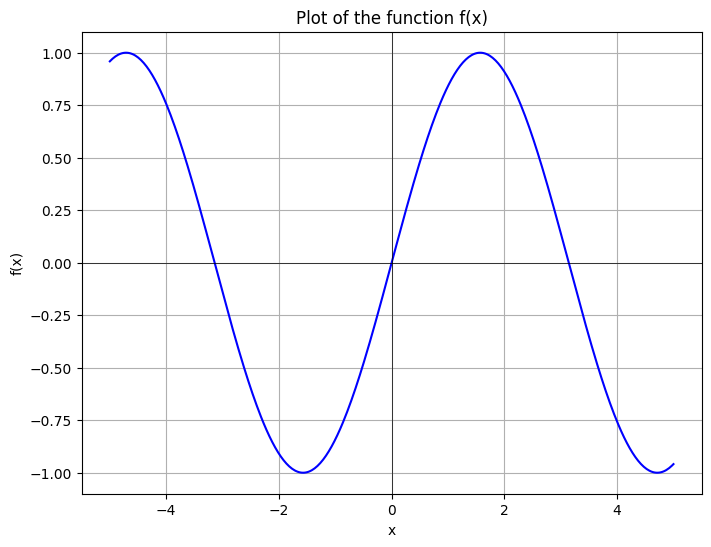

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Define the symbol and function
x = sp.Symbol('x')
fx = input('Input f(x): ')

# Get user input for the range of x
x1 = float(input('Start of x: '))
x2 = float(input('End of x: '))

# Generate x values
xx = np.linspace(x1, x2, 400)

# Convert the sympy function to a numpy function
f_lambdified = sp.lambdify(x, fx, 'numpy')

# Compute y values
yy = f_lambdified(xx)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(xx, yy, color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Plot of the function f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

In [84]:
f_prime = sp.diff(fx, x)

# Convert the SymPy function to a numpy-compatible function
f_lambdified = sp.lambdify(x, fx, 'numpy')


# Solve for critical points
critical_points = sp.solve(f_prime, x)

# Filter out non-real critical points and convert to floats
real_critical_points = [float(cp.evalf()) for cp in critical_points if cp.is_real and x1 <= float(cp.evalf()) <= x2]

# Combine input range with critical points and sort
x_values = np.array([x1, x2] + real_critical_points)

# Evaluate the function at these x values
y_values = f_lambdified(x_values)

# Find the minimum and maximum values of the function
y_min, y_max = y_values.min(), y_values.max()

print(f"Minimum value of the function in the range [{x1}, {x2}]: {y_min}")
print(f"Maximum value of the function in the range [{x1}, {x2}]: {y_max}")


Minimum value of the function in the range [-5.0, 5.0]: -1.0
Maximum value of the function in the range [-5.0, 5.0]: 1.0


In [85]:
f_prime_lambdified = sp.lambdify(x, f_prime, 'numpy')
f_lambdified = sp.lambdify(x, fx, 'numpy')

# Generate a range of x values
x_range = np.linspace(x1, x2, 100)

# Compute the derivative values for the range of x
y_prime_vals = f_prime_lambdified(x_range)

# Check if the function is increasing or decreasing in the input range
if np.all(y_prime_vals < 0):
    print(f"The function is decreasing in the input range [{x1}, {x2}]")
elif np.all(y_prime_vals > 0):
    print(f"The function is increasing in the input range [{x1}, {x2}]")
else:
    # Identify critical points within the range
    critical_points = sp.solve(f_prime, x)
    # Filter out non-real solutions and convert to floats
    real_critical_points = [float(cp.evalf()) for cp in critical_points if cp.is_real and x1 <= float(cp.evalf()) <= x2]
    real_critical_points.sort()

    # Ensure that there are intervals to analyze
    if real_critical_points:
        intervals = [(x1, real_critical_points[0])]
        intervals.extend((real_critical_points[i], real_critical_points[i + 1]) for i in range(len(real_critical_points) - 1))
        intervals.append((real_critical_points[-1], x2))
    else:
        intervals = [(x1, x2)]

    # Analyze intervals for increasing or decreasing behavior
    increasing_intervals = []
    decreasing_intervals = []

    for start, end in intervals:
        mid_point = (start + end) / 2
        mid_val = f_prime_lambdified(mid_point)
        if mid_val > 0:
            increasing_intervals.append((start, end))
        else:
            decreasing_intervals.append((start, end))

    print("Increasing intervals:", increasing_intervals)
    print("Decreasing intervals:", decreasing_intervals)


Increasing intervals: [(4.71238898038469, 5.0)]
Decreasing intervals: [(-5.0, 1.5707963267948966), (1.5707963267948966, 4.71238898038469)]


Increasing intervals: [(-10.0, np.float64(-3.970365799595579e-163)), (np.float64(1.4156319673382552e-162), 10.0)]
Decreasing intervals: [(np.float64(-3.970365799595579e-163), np.float64(-3.633504395112103e-163)), (np.float64(-3.633504395112103e-163), np.float64(-2.986552296165686e-163)), (np.float64(-2.986552296165686e-163), np.float64(-2.891232719826019e-163)), (np.float64(-2.891232719826019e-163), np.float64(-2.0876921978257543e-163)), (np.float64(-2.0876921978257543e-163), np.float64(-8.279877001246564e-164)), (np.float64(-8.279877001246564e-164), np.float64(-2.9012095928488486e-164)), (np.float64(-2.9012095928488486e-164), np.float64(2.8063193286066445e-163)), (np.float64(2.8063193286066445e-163), np.float64(8.435843335886644e-163)), (np.float64(8.435843335886644e-163), np.float64(1.4156319673382552e-162))]


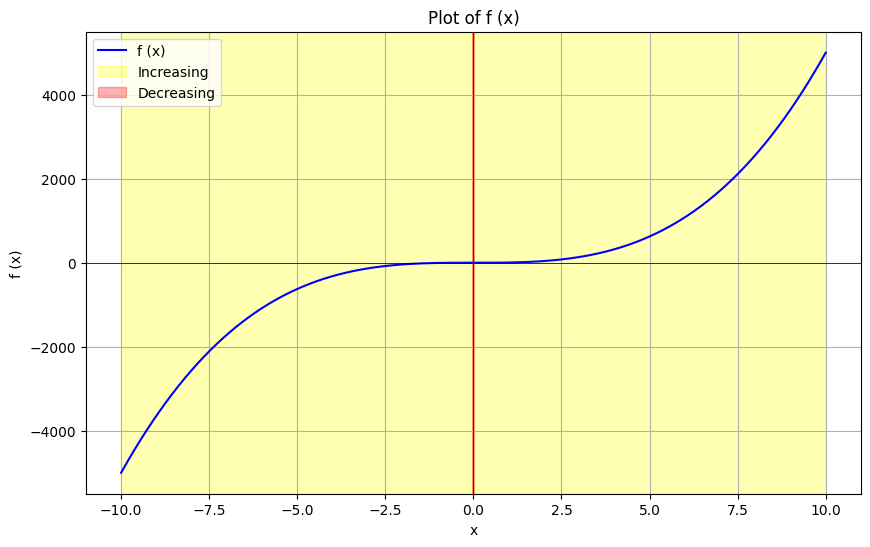

In [89]:
import numpy as np
import sympy as sp
from scipy.optimize import fsolve

# Define the symbol and function
x = sp.Symbol('x')
fx = input()

# Derivative of the function
f_prime = sp.diff(fx, x)
f_prime_lambdified = sp.lambdify(x, f_prime, 'numpy')
f_lambdified = sp.lambdify(x, fx, 'numpy')

# Get user input for the range of x
x1 = float(input('Start of x: '))
x2 = float(input('End of x: '))

# Generate a range of x values for plotting or analysis
x_range = np.linspace(x1, x2, 1000)
y_values = f_lambdified(x_range)

# Find critical points numerically
def f_prime_func(x_val):
    return f_prime_lambdified(x_val)

# Use a range of initial guesses for the solver
initial_guesses = np.linspace(x1, x2, 10)
critical_points = fsolve(f_prime_func, initial_guesses)

# Filter critical points to be within the range
critical_points = [cp for cp in critical_points if x1 <= cp <= x2]
critical_points = np.array(critical_points)

# Ensure critical points are unique and sorted
critical_points = np.unique(np.sort(critical_points))

# Generate intervals around critical points
intervals = [(x1, critical_points[0])] if len(critical_points) > 0 else [(x1, x2)]
intervals.extend((critical_points[i], critical_points[i + 1]) for i in range(len(critical_points) - 1))
if len(critical_points) > 0:
    intervals.append((critical_points[-1], x2))

# Analyze intervals for increasing or decreasing behavior
increasing_intervals = []
decreasing_intervals = []

for start, end in intervals:
    mid_point = (start + end) / 2
    mid_val = f_prime_lambdified(mid_point)
    if mid_val > 0:
        increasing_intervals.append((start, end))
    else:
        decreasing_intervals.append((start, end))

print("Increasing intervals:", increasing_intervals)
print("Decreasing intervals:", decreasing_intervals)

# Optionally, plot the function and intervals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x_range, y_values, label='f (x)', color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Plot of f (x)')
plt.xlabel('x')
plt.ylabel('f (x)')

# Mark intervals
for start, end in increasing_intervals:
    plt.axvspan(start, end, color='yellow', alpha=0.3, label='Increasing' if start == increasing_intervals[0][0] else "")
for start, end in decreasing_intervals:
    plt.axvspan(start, end, color='red', alpha=0.3, label='Decreasing' if start == decreasing_intervals[0][0] else "")

plt.legend()
plt.grid(True)
plt.show()


Increasing intervals: [(np.float64(-9.42477796076938), np.float64(-6.283185307179769)), (np.float64(-3.141592653589793), np.float64(3.3019279809094546e-10)), (np.float64(3.141592653589793), np.float64(6.283185307179769)), (np.float64(9.42477796076938), 10.0)]
Decreasing intervals: [(-10.0, np.float64(-9.42477796076938)), (np.float64(-6.283185307179769), np.float64(-3.141592653589793)), (np.float64(3.3019279809094546e-10), np.float64(4.005750728159135e-10)), (np.float64(4.005750728159135e-10), np.float64(3.141592653589793)), (np.float64(6.283185307179769), np.float64(9.42477796076938))]
Minimum value of the function in the range [-10.0, 10.0]: -1.0
Maximum value of the function in the range [-10.0, 10.0]: 1.0


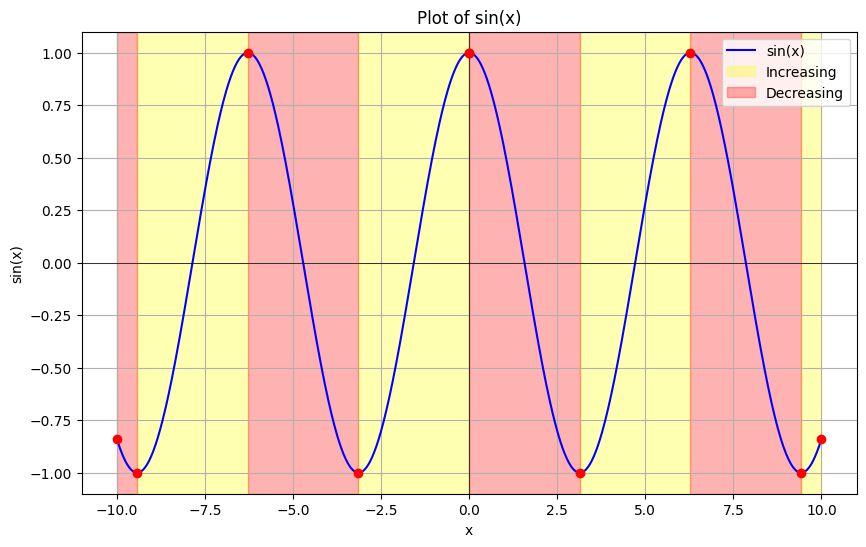

In [95]:
import numpy as np
import sympy as sp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define the symbol and function
x = sp.Symbol('x')
fx = input('Input f(x): ')
# Derivative of the function
f_prime = sp.diff(fx, x)
f_prime_lambdified = sp.lambdify(x, f_prime, 'numpy')
f_lambdified = sp.lambdify(x, fx, 'numpy')

# Get user input for the range of x
x1 = float(input('Start of x: '))
x2 = float(input('End of x: '))

# Generate a range of x values for plotting or analysis
x_range = np.linspace(x1, x2, 1000)
y_values = f_lambdified(x_range)

# Find critical points numerically
def f_prime_func(x_val):
    return f_prime_lambdified(x_val)

# Use a range of initial guesses for the solver
initial_guesses = np.linspace(x1, x2, 10)
critical_points = fsolve(f_prime_func, initial_guesses)

# Filter critical points to be within the range
critical_points = [cp for cp in critical_points if x1 <= cp <= x2]
critical_points = np.array(critical_points)

# Ensure critical points are unique and sorted
critical_points = np.unique(np.sort(critical_points))

# Generate intervals around critical points
intervals = [(x1, critical_points[0])] if len(critical_points) > 0 else [(x1, x2)]
intervals.extend((critical_points[i], critical_points[i + 1]) for i in range(len(critical_points) - 1))
if len(critical_points) > 0:
    intervals.append((critical_points[-1], x2))

# Analyze intervals for increasing or decreasing behavior
increasing_intervals = []
decreasing_intervals = []

for start, end in intervals:
    mid_point = (start + end) / 2
    mid_val = f_prime_lambdified(mid_point)
    if mid_val > 0:
        increasing_intervals.append((start, end))
    else:
        decreasing_intervals.append((start, end))

# Include critical points and endpoints for min/max calculation
points_to_evaluate = [x1, x2] + list(critical_points)
y_values_at_points = f_lambdified(points_to_evaluate)

# Compute min and max values
y_min = np.min(y_values_at_points)
y_max = np.max(y_values_at_points)

print("Increasing intervals:", increasing_intervals)
print("Decreasing intervals:", decreasing_intervals)
print(f"Minimum value of the function in the range [{x1}, {x2}]: {y_min}")
print(f"Maximum value of the function in the range [{x1}, {x2}]: {y_max}")

# Plot the function and intervals
plt.figure(figsize=(10, 6))
plt.plot(x_range, y_values, label='sin(x)', color='b')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Plot of sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')

# Mark intervals
for start, end in increasing_intervals:
    plt.axvspan(start, end, color='yellow', alpha=0.3, label='Increasing' if start == increasing_intervals[0][0] else "")
for start, end in decreasing_intervals:
    plt.axvspan(start, end, color='red', alpha=0.3, label='Decreasing' if start == decreasing_intervals[0][0] else "")

# Plot critical points
for point in points_to_evaluate:
    plt.plot(point, f_lambdified(point), 'ro')  # Mark critical points and endpoints

plt.legend()
plt.grid(True)
plt.show()
